### Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# From sklearn

# Custom cleaning functions
from utils import cleaning_functions

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

#### Reading and cleaning training set

In [10]:
mailout_train = pd.read_csv('data/Udacity_MAILOUT_052018_TRAIN.csv')

C:\Users\jobqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
training_clean = cleaning_functions.clean_data(mailout_train)

Initial amount of missing values: 2217201

Reading the description of attributes table....

Missing values after including missing codes 2354411
Additional missing values: 137210

Starting the cleaning of attributes and feature engineering...


In [12]:
training_clean.drop(['LNR'], axis = 1, inplace = True)

In [13]:
training_clean.head()

,ARBEIT,BALLRAUM,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,...,REGIOTYP_7.0,CAMEO_DEUG_2015_1.0,CAMEO_DEUG_2015_2.0,CAMEO_DEUG_2015_3.0,CAMEO_DEUG_2015_4.0,CAMEO_DEUG_2015_5.0,CAMEO_DEUG_2015_6.0,CAMEO_DEUG_2015_7.0,CAMEO_DEUG_2015_8.0,CAMEO_DEUG_2015_9.0
0,3.0,5.0,5.0,2.0,2.0,5.0,5.0,5.0,5.0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,5.0,2.0,2.0,2.0,4.0,3.0,5.0,4.0,1,...,0,0,0,0,0,1,0,0,0,0
2,4.0,1.0,5.0,1.0,1.0,5.0,5.0,5.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,2.0,5.0,2.0,2.0,5.0,5.0,5.0,4.0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.0,4.0,5.0,1.0,2.0,5.0,5.0,5.0,5.0,0,...,1,0,0,0,0,0,0,1,0,0


### Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(training_clean.drop(['RESPONSE'], axis = 1))

train_scaled = pd.DataFrame(train_scaled, columns = list(training_clean.columns)[:-1])

train_scaled.head()

,ARBEIT,BALLRAUM,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,...,REGIOTYP_6.0,REGIOTYP_7.0,CAMEO_DEUG_2015_1.0,CAMEO_DEUG_2015_2.0,CAMEO_DEUG_2015_3.0,CAMEO_DEUG_2015_4.0,CAMEO_DEUG_2015_5.0,CAMEO_DEUG_2015_6.0,CAMEO_DEUG_2015_7.0,CAMEO_DEUG_2015_8.0
0,-0.220282,0.203551,0.756779,-0.396140,-0.211671,0.563449,0.580345,0.560862,0.580973,-0.224018,...,-0.286551,-0.242063,-0.350607,-0.338773,-0.368279,3.996789,-0.66823,-0.277121,-0.36333,-0.24645
1,-1.216569,0.203551,-1.329511,-0.396140,-0.211671,-0.521138,-1.309792,0.560862,-0.443101,1.978334,...,-0.286551,-0.242063,-0.350607,-0.338773,-0.368279,3.996789,-0.66823,-0.277121,-0.36333,-0.24645
2,0.776006,-1.704266,0.756779,-1.138807,-0.929186,0.563449,0.580345,0.560862,0.580973,-0.224018,...,-0.286551,-0.242063,2.852196,-0.338773,-0.368279,-0.250201,-0.66823,-0.277121,-0.36333,-0.24645
3,0.776006,-1.227312,0.756779,-0.396140,-0.211671,0.563449,0.580345,0.560862,-0.443101,-0.224018,...,-0.286551,-0.242063,2.852196,-0.338773,-0.368279,-0.250201,-0.66823,-0.277121,-0.36333,-0.24645
4,-0.220282,-0.273403,0.756779,-1.138807,-0.211671,0.563449,0.580345,0.560862,0.580973,-0.224018,...,3.489775,-0.242063,-0.350607,-0.338773,-0.368279,-0.250201,-0.66823,3.608537,-0.36333,-0.24645


### Classifiers

In [16]:
from sklearn.linear_model import SGDClassifier

X = train_scaled.values
y = training_clean['RESPONSE'].values

clf = SGDClassifier()

clf.fit(X, y)

SGDClassifier()

In [17]:
preds = clf.predict(X)

In [18]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score

print( confusion_matrix(y, preds) )

roc_auc_score(y, preds)

[[42418    12]
 [  532     0]]


0.49985859061984445

### RandomForest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 42)

rf_clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [20]:
preds = rf_clf.predict(X)

print( confusion_matrix(y, preds) )

roc_auc_score(y, preds)

[[42430     0]
 [   57   475]]


0.9464285714285714

#### CV

In [21]:
from sklearn.model_selection import cross_val_predict

rf_clf = RandomForestClassifier(random_state = 42)

y_pred = cross_val_predict(rf_clf, X, y)  # cv = 5


In [22]:
print( confusion_matrix(y, y_pred) )

roc_auc_score(y, y_pred)

[[42418    12]
 [  532     0]]


0.49985859061984445

### Hyperparameters

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1, random_state = 42)

y_pred = cross_val_predict(rf_clf, X, y)  # cv = 5

print( confusion_matrix(y, y_pred) )

roc_auc_score(y, y_pred)

[[42430     0]
 [  532     0]]


0.5

### Split dataset

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(len(X_train), len(X_test), len(y_train), len(y_test)) 

34369 8593 34369 8593


### Hyperparameter grids

In [115]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier() # class_weight = 'balanced')

rf_hyperparameters = {'n_estimators': [150, 175, 185, 200], #, 250, 300],  
                      'max_depth': [ 3, 4, 5, 6, 7], 
                      'max_features': ['auto', 'sqrt', 0.33],
                      'min_samples_leaf': [3, 5, 10, 12, 15]}

model = GridSearchCV(rfc, rf_hyperparameters, scoring = 'roc_auc', n_jobs = -1, verbose = 10, cv = 3)

preds = model.fit(X, y)

print(model.best_params_)

print(model.best_score_)

rfc_final = model.best_estimator_

y_pred= rfc_final.predict_proba(X)[:,1]

print(roc_auc_score(y, y_pred))

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'max_depth': 5, 'max_features': 0.33, 'min_samples_leaf': 15, 'n_estimators': 200}
0.7667679199174828
0.8570148710215321


In [ ]:
rfc_bal = RandomForestClassifier(class_weight = 'balanced')

rf_hyperparameters = {'n_estimators': [125, 150, 175], #, 250, 300],  
                      'max_depth': [2, 3, 4, 5, 6, 10], 
                      'max_features': ['auto', 'sqrt', 0.33],
                      'min_samples_leaf': [3, 10, 15]}

model_bal = GridSearchCV(rfc_bal, rf_hyperparameters, scoring = 'roc_auc', n_jobs = -1, verbose = 10, cv = 3)

preds = model_bal.fit(X_train, y_train)

print(model_bal.best_params_)

print(model_bal.best_score_)

rfc_bal_final = model_bal.best_estimator_

y_pred_train = rfc_bal_final.predict_proba(X_train)[:,1]
y_pred_test = rfc_bal_final.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train, y_pred_train))

print(roc_auc_score(y_test, y_pred_test))

## Boruta

In [35]:
# !pip install boruta

In [36]:
from boruta import BorutaPy

clf = RandomForestClassifier(n_jobs=-1, max_depth = 5, class_weight = 'balanced')

trans = BorutaPy(clf, n_estimators = 'auto', random_state = 42, verbose=2, max_iter = 100)

X_filtered = trans.fit_transform(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	212
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	212
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	212
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	212
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	212
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	212
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	212
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	201
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	201
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	201
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	201
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	203
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	203
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	203
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	203
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	2

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_filtered, y)

LogisticRegression()

In [38]:
preds = clf.predict(X_filtered)

print( confusion_matrix(y, preds) )

[[42430     0]
 [  532     0]]


In [39]:
X_filtered

array([[-0.81144176, -0.40948314,  1.48920468, ...,  0.24875853,
         1.65974792, -0.69625873],
       [-0.19024662,  2.45616514, -1.52973644, ...,  0.06318366,
        -0.60250113, -0.69625873],
       [-0.81144176,  0.30692893, -1.52973644, ...,  1.36220777,
        -0.60250113, -0.69625873],
       ...,
       [-0.81144176, -0.40948314,  0.28162823, ...,  0.666302  ,
        -0.60250113, -0.69625873],
       [-1.12203933, -1.12589521,  0.88541646, ...,  0.01678994,
        -0.60250113, -0.69625873],
       [ 1.05214367, -1.12589521,  0.88541646, ...,  1.03745174,
        -0.60250113,  1.4362477 ]])

### Using X_filtered

In [40]:
rf_cl = RandomForestClassifier(class_weight = 'balanced')

rf_hyperparameters = {'n_estimators': [150, 200, 250, 300],  
                      'max_depth': [2, 3, 4, 6, 10], 
                      'max_features': ['auto', 'sqrt', 0.33],
                      'min_samples_leaf': [3, 10, 15]}

model_bor = GridSearchCV(rf_cl, rf_hyperparameters, scoring = 'roc_auc', n_jobs = -1, verbose = 10, cv = 5)

preds = model_bor.fit(X_filtered, y)

print(model_bor.best_params_)
model_bor.best_score_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 200}


0.7722916515062119

#### Spliting X_filtered

In [41]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_filtered, y, test_size = 0.2, random_state = 42, stratify = y)

In [42]:
rf_cl_2 = RandomForestClassifier()

rf_hyperparameters = {'n_estimators': [150, 200, 250, 300],  
                      'max_depth': [2, 3, 4, 6, 10], 
                      'max_features': ['auto', 'sqrt', 0.33],
                      'min_samples_leaf': [3, 10, 15]}

model_bor2 = GridSearchCV(rf_cl_2, rf_hyperparameters, scoring = 'roc_auc', n_jobs = -1, verbose = 10, cv = 5)

preds = model_bor2.fit(Xf_train, yf_train)

print(model_bor2.best_params_)
model_bor2.best_score_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'max_depth': 6, 'max_features': 0.33, 'min_samples_leaf': 10, 'n_estimators': 150}


0.7722197024403383

In [43]:
boruta_rf2_best = model_bor2.best_estimator_

y_bor_pred_train = boruta_rf2_best.predict_proba(Xf_train)[:,1]
y_bor_pred_test = boruta_rf2_best.predict_proba(Xf_test)[:,1]

print(roc_auc_score(yf_train, y_bor_pred_train))

print(roc_auc_score(yf_test, y_bor_pred_test))

0.828012206047172
0.7796613466544838


In [44]:
y_bor_pred_test

array([0.01104199, 0.03028916, 0.0070229 , ..., 0.01185699, 0.00395929,
       0.00123843])

In [45]:
print( confusion_matrix(yf_test, boruta_rf2_best.predict(Xf_test)) )

[[8487    0]
 [ 106    0]]


### XGBosst

In [48]:
#!pip install xgboost
import xgboost as xgb

In [49]:
data_dmatrix = xgb.DMatrix(data = X, label = y)

In [50]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 5,
                           n_estimators = 10,
                           n_jobs = -1, 
                           eval_metric = 'auc')

xgb_clf.fit(X, y)

C:\Users\jobqu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [51]:
y_xgb = xgb_clf.predict(X)

In [52]:
print( confusion_matrix(y, y_xgb) )

[[42430     0]
 [  532     0]]


### Hyperparameter

In [53]:
xgb_clf = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', eval_metric = 'auc', scale_pos_weight = 99)

xgb_hyperparameters = {'n_estimators': [10, 50, 100], 
                       'max_depth': [2, 5, 8],
                       'gamma': [0.001, 0.01, 0.1],    
                       'learning_rate': [0.001, 0.01, 0.1],
                       'colsample_bytree': [0.75, 0.9, 1.0], 
                       # 'scale_pos_weight': [1, 80, 99, 100]
                        }

xgb_cv = GridSearchCV(xgb_clf, xgb_hyperparameters, scoring = 'roc_auc', n_jobs = -1, verbose = 3, cv = 3)

xgb_cv.fit(X, y)

print(xgb_cv.best_params_)
xgb_cv.best_score_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\jobqu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'colsample_bytree': 0.75, 'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}


0.7600238185600064

In [54]:
xgb_final = xgb_cv.best_estimator_

y_pred_prob = xgb_final.predict_proba(X)[:,1]

print(roc_auc_score(y, y_pred_prob))

0.7781471339791856


In [55]:
print( confusion_matrix(y, xgb_final.predict(X)) )

[[24314 18116]
 [   73   459]]


In [56]:
# xgb_cv.best_estimator_

In [57]:
xgb_final.predict(X)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

### Probar el anterior pero spliting X...

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [59]:
xgb_clf_split = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', eval_metric = 'auc', scale_pos_weight = 99)

xgb_hyperparameters = {'n_estimators': [10, 50, 100], 
                       'max_depth': [2, 5, 8],
                       'gamma': [0.001, 0.01, 0.1],    
                       'learning_rate': [0.001, 0.01, 0.1],
                       'colsample_bytree': [0.75, 0.9, 1.0], 
                       # 'scale_pos_weight': [1, 80, 99, 100]
                        }

xgb_cv_split = GridSearchCV(xgb_clf_split, xgb_hyperparameters, scoring = 'roc_auc', n_jobs = -1, verbose = 3, cv = 3)

xgb_cv_split.fit(X_train, y_train)

print(xgb_cv_split.best_params_)

xgb_cv_split.best_score_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\jobqu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'colsample_bytree': 0.9, 'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}


0.7595338253861099

In [60]:
xgb_final_split = xgb_cv_split.best_estimator_

y_train_prob = xgb_final_split.predict_proba(X_train)[:,1]
y_test_prob = xgb_final_split.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train, y_train_prob))
print(roc_auc_score(y_test, y_test_prob))

0.778652391422848
0.775495708197443


In [61]:
print( confusion_matrix(y_train, xgb_final_split.predict(X_train)) )

[[19477 14466]
 [   61   365]]


In [62]:
print( confusion_matrix(y_test, xgb_final_split.predict(X_test)) )

[[4837 3650]
 [  12   94]]


### RandomSearch

In [84]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform


xgb_clf = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', eval_metric = 'auc', 
                            scale_pos_weight = 99) #, use_label_encoder=False)

xgb_distributions = {'n_estimators':[4, 5, 6, 7, 10, 50, 100, 150, 200],  # [5, 10, 50, 100], 
                       'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                       'gamma': loguniform(1e-4, 1e0),    
                       'learning_rate': loguniform(1e-4, 1e0), 
                       'colsample_bytree':  stats.uniform(0.1, 1.0),}
                       # 'scale_pos_weight': [1, 80, 99, 100]}

xgb_r_cv = RandomizedSearchCV(xgb_clf, 
                        param_distributions = xgb_distributions, 
                        n_iter = 400,
                        scoring = 'roc_auc', 
                        n_jobs = -1, 
                        verbose = 3, 
                        cv = 3)

xgb_r_cv.fit(X, y)

print(xgb_r_cv.best_params_)
xgb_r_cv.best_score_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\Users\jobqu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.71663237 0.69226298 0.75398028 0.73496146 0.72372913 0.75018601
 0.70373809 0.75542144 0.73061949 0.76043715 0.69474747 0.7374105
 0.64102387 0.73142782 0.73806819 0.75828867 0.76022935        nan
 0.74209905        nan 0.75441686 0.68018131 0.75831844 0.75263874
 0.76147084 0.62820255        nan 0.75775887 0.73132865 0.6895007
 0.68772957 0.73138537 0.74336084 0.75604273 0.7282428  0.75381216
 0.74033653 0.74439593 0.7317754  0.58662157 0.76336647 0.71419946
 0.72006834 0.56734973 0.73712328 0.73876155 0.68091828 0.73528423
        nan 0.75699406 0.71249572 0.75880264 0.74633317 0.73978365
 0.75986092 0.73928167 0.73456574        nan 0.75346608 0.7428183
        nan 0.74622141 0.70232421 0.72997013 0.740285   0.72619752
 0.71663827 0.73391804 0.69550644 0.73385057 0.66787364 0.7423218
 0.69611814 0.75745267 0.75690806 0.69593565 0.61663025 0

{'colsample_bytree': 0.5642169219293882, 'gamma': 0.0006324581847080217, 'learning_rate': 0.0034143277530612657, 'max_depth': 3, 'n_estimators': 50}


0.7662603267015683

Este ya se va a probar con test_set...

In [85]:
xgb_final = xgb_r_cv.best_estimator_

y_pred_prob = xgb_final.predict_proba(X)[:,1]

print(roc_auc_score(y, y_pred_prob))

confusion_matrix(y, xgb_final.predict(X))

0.7983259911503955


array([[25080, 17350],
       [   75,   457]], dtype=int64)

In [78]:
xgb_clf = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', eval_metric = 'auc', 
                            scale_pos_weight = 99) #, use_label_encoder=False)

xgb_distributions = {'n_estimators': [4, 5, 6, 7, 10, 50, 100], 
                       'max_depth': [2, 3, 4, 5, 6, 7, 8],
                       'gamma': loguniform(1e-4, 1e0),    
                       'learning_rate': loguniform(1e-4, 1e0), 
                       'colsample_bytree':  stats.uniform(0.5, 1.0),
                       'scale_pos_weight': [1, 80, 99, 100]}

xgb_r_cv = RandomizedSearchCV(xgb_clf, 
                        param_distributions = xgb_distributions, 
                        n_iter = 300,
                        scoring = 'roc_auc', 
                        n_jobs = -1, 
                        verbose = 3, 
                        cv = 3)

xgb_r_cv.fit(X_filtered, y)

print(xgb_r_cv.best_params_)
print(xgb_r_cv.best_score_)


xgb_final = xgb_r_cv.best_estimator_

y_pred_prob = xgb_final.predict_proba(X_filtered)[:,1]

print(roc_auc_score(y, y_pred_prob))

confusion_matrix(y, xgb_final.predict(X_filtered))

Fitting 3 folds for each of 300 candidates, totalling 900 fits


C:\Users\jobqu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.74306202        nan 0.7468537  0.71802416 0.76133924        nan
 0.67856404        nan        nan 0.75509126        nan 0.75430993
        nan        nan        nan        nan 0.75244012        nan
        nan        nan 0.75672445        nan 0.76256494 0.74902801
 0.76445047        nan 0.76214088 0.7571419         nan 0.757784
        nan 0.76042916        nan        nan        nan        nan
        nan 0.76565489        nan        nan        nan 0.74844483
 0.76355961        nan 0.76588652        nan        nan        nan
 0.75910042 0.76101485 0.75739955 0.72461913        nan        nan
 0.76265693 0.75588819        nan        nan 0.75691697        nan
 0.75580315        nan        nan 0.75733609 0.7669301         nan
        nan        nan        nan 0.76149666        nan        nan
 0.75624403        nan 0.75615663        nan 0.76143679

{'colsample_bytree': 0.6856900447798496, 'gamma': 0.00019706016482668386, 'learning_rate': 0.04274716034639669, 'max_depth': 5, 'n_estimators': 10, 'scale_pos_weight': 80}
0.7680949532930706
0.8079706026201492


array([[28492, 13938],
       [  105,   427]], dtype=int64)

### Con Splits

In [81]:
xgb_clf = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', eval_metric = 'auc') #, use_label_encoder=False)

xgb_distributions = {'n_estimators': [4, 5, 6, 7, 10, 50, 100], 
                       'max_depth': [2, 3, 4, 5, 6, 7, 8],
                       'gamma': loguniform(1e-4, 1e0),    
                       'learning_rate': loguniform(1e-4, 1e0), 
                       'colsample_bytree':  stats.uniform(0.5, 1.0),
                       'scale_pos_weight': [1, 80, 99, 100]}

xgb_r_cv = RandomizedSearchCV(xgb_clf, 
                        param_distributions = xgb_distributions, 
                        n_iter = 400,
                        scoring = 'roc_auc', 
                        n_jobs = -1, 
                        verbose = 3, 
                        cv = 3)

xgb_r_cv.fit(Xf_train, yf_train)

print(xgb_r_cv.best_params_)
print(xgb_r_cv.best_score_)


xgb_final = xgb_r_cv.best_estimator_

y_prob_ftrain = xgb_final.predict_proba(Xf_train)[:,1]
y_prob_ftest = xgb_final.predict_proba(Xf_test)[:,1]

print(roc_auc_score(yf_train, y_prob_ftrain))
print(roc_auc_score(yf_test, y_prob_ftest))

print(confusion_matrix(yf_train, xgb_final.predict(Xf_train)))
print(confusion_matrix(yf_test, xgb_final.predict(Xf_test)))

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\Users\jobqu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7612159         nan        nan        nan 0.74035046
 0.67568133 0.72810689        nan        nan 0.75365393 0.74898323
        nan        nan        nan        nan 0.74452261 0.76058528
        nan        nan 0.76066503        nan 0.75183987        nan
 0.76076566 0.73369853 0.72810689 0.75873099 0.75680322        nan
        nan 0.75888689        nan        nan        nan        nan
        nan 0.72463393 0.75552379        nan 0.76066325 0.7608379
        nan        nan 0.7569124         nan        nan 0.74001326
        nan 0.75905552 0.74003536 0.76392598        nan 0.76064252
        nan 0.75614157        nan 0.75926229        nan        nan
        nan        nan        nan 0.76237045 0.75579268        nan
 0.76211058 0.76026813        nan 0.74628221 0.75843776 0.75834443
 0.75879871 0.74226737 0.75915353 0.75708127 0.7572484

{'colsample_bytree': 0.682998796281071, 'gamma': 0.012626100564399077, 'learning_rate': 0.03295115006484807, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 1}
0.768845663365538
0.7979840616532079
0.7877102827632051
[[33943     0]
 [  426     0]]
[[8487    0]
 [ 106    0]]


### ADABOOST

In [66]:
from sklearn.ensemble import AdaBoostClassifier

adab_clf = AdaBoostClassifier()

adab_hyperparams = {'n_estimators': [5, 10, 50, 100, 200], 
                    'learning_rate': [0.01, 0.1, 1, 2]}


adab_cv = GridSearchCV(adab_clf, adab_hyperparams, scoring = 'roc_auc', n_jobs = -1, verbose = 3, cv = 3)

adab_cv.fit(X, y)

print(adab_cv.best_params_)
adab_cv.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'learning_rate': 0.1, 'n_estimators': 50}


0.7620436129927999

In [67]:
adab_final = adab_cv.best_estimator_

y_pred_prob = adab_final.predict_proba(X)[:,1]

print(roc_auc_score(y, y_pred_prob))

confusion_matrix(y, adab_final.predict(X))

0.7757741188937464


array([[42430,     0],
       [  532,     0]], dtype=int64)

In [71]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [75]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(class_weight = 'balanced', early_stopping = True, loss = 'modified_huber')

sgd_hyperparams = {'penalty': ['l2', 'l1', 'elasticnet'], 
                   'alpha': [0.00005, 0.0001, 0.0002]}

sgd_cv = GridSearchCV(sgd_clf, sgd_hyperparams, scoring = 'roc_auc', n_jobs = -1, verbose = 3, cv = 3)

sgd_cv.fit(X, y)

print(sgd_cv.best_params_)
print(sgd_cv.best_score_)

### 

sgd_final = sgd_cv.best_estimator_

y_pred_prob = sgd_final.predict_proba(X)[:,1]

print(roc_auc_score(y, y_pred_prob))

confusion_matrix(y, sgd_final.predict(X))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'alpha': 5e-05, 'penalty': 'l1'}
0.6398333146377478
0.6724003400558904


array([[30681, 11749],
       [  201,   331]], dtype=int64)

In [76]:
sgd_clf = SGDClassifier(class_weight = 'balanced', early_stopping = True, loss = 'modified_huber')

sgd_hyperparams = {'penalty': ['l2', 'l1', 'elasticnet'], 
                   'alpha': [0.00005, 0.0001, 0.0002]}

sgd_cv = GridSearchCV(sgd_clf, sgd_hyperparams, scoring = 'roc_auc', n_jobs = -1, verbose = 3, cv = 3)

sgd_cv.fit(X_filtered, y)

print(sgd_cv.best_params_)
print(sgd_cv.best_score_)

### 

sgd_final = sgd_cv.best_estimator_

y_pred_prob = sgd_final.predict_proba(X_filtered)[:,1]

print(roc_auc_score(y, y_pred_prob))

confusion_matrix(y, sgd_final.predict(X_filtered))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'alpha': 0.0001, 'penalty': 'elasticnet'}
0.6259256825330947
0.6384598516087533


array([[22161, 20269],
       [  141,   391]], dtype=int64)

In [ ]:
from sklearn.pipeline import make_pipeline

pipelines = {'l1': make_pipeline(StandardScaler(),
                                LogisticRegression(random_state = 123, penalty='l1')),
            'l2': make_pipeline(StandardScaler(),
                               LogisticRegression(random_state = 123, penalty='l2')),
            'rf': make_pipeline(StandardScaler(),
                                RandomForestClassifier(random_state = 123)),
            'gb': make_pipeline(StandardScaler(),
                                GradientBoostingClassifier(random_state=123))
           }

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [106]:
mailout_test = pd.read_csv('data/Udacity_MAILOUT_052018_TEST.csv')

test_clean = cleaning_functions.clean_data(mailout_test)

print('\n\nMissing values:', test_clean.isnull().sum().sum()) 

print(test_clean.shape)

test_clean.set_index(['LNR'], inplace = True)

test_clean.head()

C:\Users\jobqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Initial amount of missing values: 2186771

Reading the description of attributes table....

Missing values after including missing codes 2322980
Additional missing values: 136209

Starting the cleaning of attributes and feature engineering...


Missing values: 0
(42833, 213)


,ARBEIT,BALLRAUM,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,...,REGIOTYP_7.0,CAMEO_DEUG_2015_1.0,CAMEO_DEUG_2015_2.0,CAMEO_DEUG_2015_3.0,CAMEO_DEUG_2015_4.0,CAMEO_DEUG_2015_5.0,CAMEO_DEUG_2015_6.0,CAMEO_DEUG_2015_7.0,CAMEO_DEUG_2015_8.0,CAMEO_DEUG_2015_9.0
LNR,,,,,,,,,,,,,,,,,,,,,
1754,3.0,6.0,5.0,1.0,2.0,5.0,5.0,5.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0
1770,4.0,7.0,5.0,2.0,2.0,5.0,5.0,4.0,5.0,0,...,0,0,0,0,0,1,0,0,0,0
1465,4.0,1.0,5.0,2.0,2.0,5.0,5.0,5.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
1470,4.0,1.0,5.0,2.0,1.0,5.0,5.0,5.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0
1478,3.0,6.0,1.0,3.0,2.0,4.0,4.0,4.0,3.0,3,...,0,0,0,0,0,1,0,0,0,0


In [107]:
# Scaler
test_scaled = scaler.transform(test_clean)

In [108]:
preds = xgb_final.predict(test_scaled)

In [109]:
preds = xgb_final.predict_proba(test_scaled)[:,1]

In [110]:
pred_df = pd.DataFrame(preds, index = test_clean.index)

pred_df.reset_index(inplace = True)

pred_df.columns = ['LNR', 'RESPONSE']

print(pred_df.shape)

pred_df.head()

(42833, 2)


,LNR,RESPONSE
0,1754,0.534138
1,1770,0.539665
2,1465,0.468753
3,1470,0.461999
4,1478,0.464511


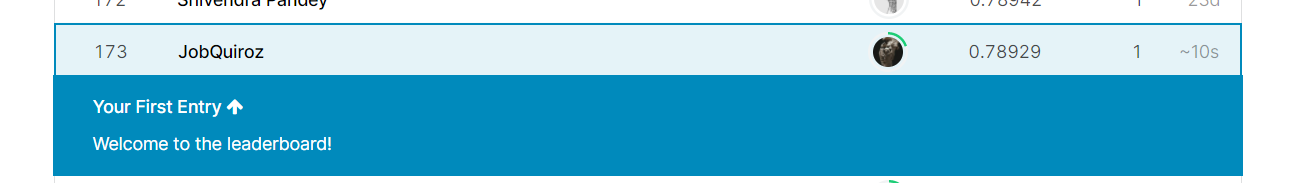

In [113]:
pred_df.to_csv('predictions_1.csv', index = False)

### RFC

In [116]:
mailout_test = pd.read_csv('data/Udacity_MAILOUT_052018_TEST.csv')

test_clean = cleaning_functions.clean_data(mailout_test)

print('\n\nMissing values:', test_clean.isnull().sum().sum()) 

print(test_clean.shape)

test_clean.set_index(['LNR'], inplace = True)

# Scaler
test_scaled = scaler.transform(test_clean)

preds_2 = rfc_final.predict_proba(test_scaled)[:,1]


preds_2_df = pd.DataFrame(preds_2, index = test_clean.index)

preds_2_df.reset_index(inplace = True)

preds_2_df.columns = ['LNR', 'RESPONSE']

print(preds_2_df.shape)

preds_2_df.head()

C:\Users\jobqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Initial amount of missing values: 2186771

Reading the description of attributes table....

Missing values after including missing codes 2322980
Additional missing values: 136209

Starting the cleaning of attributes and feature engineering...


Missing values: 0
(42833, 213)
(42833, 2)


,LNR,RESPONSE
0,1754,0.026685
1,1770,0.037975
2,1465,0.002877
3,1470,0.002934
4,1478,0.011136


In [117]:
preds_2_df.to_csv('predictions_2.csv', index = False)

![img](Submit_2.png)